# <center>Allrecipes analysis part 2: exploratory analysis</center>

In this stage of the project, we are going to focus on performing exploratory analysis on the recipes from www.allrecipes.com. Data has already been cleaned and transformed in "Allrecipes analysis - part 1 preparing data".

Analysis has been divided into five sections. In the course of analysis we will be focusing mainly on creating visualizations in a way that allows drawing conclusions on specific problems but both aggregating and transforming data play a crucial part in answering certain questions about the dataset. Here are all of the issues that we will try to address within the sections:

<b>GENERAL INFORMATION AND FINAL ADJUSTMENTS IN DATA</b>
- Data examination
- The last correction in data

<b>RECIPE SCORE:</b>
- Five highest scored recipes
- Five highest scored recipes with at least 1000 reviews
- Calories vs recipe score categorised by whether there is meat in the dish
- Recipe score vs number of herbs used in a recipe

<b>TIME:</b>
- Total cooking time by occurrence of meat
- Distribution of different cooking times for recipes with and without meat

<b>HERBS:</b>
- Percentage of recipes containing specific herbs - divided into recipes with and without meat
- Whether recipes with meat use more herbs on average than recipes without meat
- Average recipe score in groups of recipes containing specific herb
- Effect of herb occurance on recipe's caloric value

<b>NUTRITION:</b>
- Five most caloric recipes
- Ten recipes with highest protein value per serving
- Recipes with high protein value (in 75th percentile) and low caloric value (in 25th percentile
- Dependencies between nutrients

Answer to some of the problems should, of course, be validated with some statistical hypothesis testing. This is, however, an analysical project and not a scientific one, therefore this step has been skipped in majority of cases (but there is still an example of hypothesis test in one of the herb-related topics).

We will first import all relevant modules, set pandas display options, adjust seaborn style and read data from the allrecipes_data.csv file (available in the directory) and perform some preliminary examination of data.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
pd.set_option('expand_frame_repr', False)

# Set seaborn styles
sns.set_style("darkgrid")
colors = ['#D98880', '#7FB3D5', '#76D7C4', '#F8C471', '#C39BD3']
sns.set_palette(sns.color_palette(colors))

allrecipes_df = pd.read_csv('allrecipes_data.csv', index_col = [0])

### <center>GENERAL INFORMATION AND FINAL ADJUSTMENTS IN DATA</center>
<center>In this section we will gather general information about the data and make some final adjustments before proper analysis</center>

In [2]:
allrecipes_df.head()

,name,prep,cook,additional,total,servings,yield,5 stars,4 stars,3 stars,2 stars,1 stars,nutrition,ingredients,recipe_score,number_of_reviews,calories,protein [g],carbohydrates [g],fat [g],cholesterol [mg],sodium [mg],calories_per_serving,cinnamon,celery,pepper,garlic,cilantro,black pepper,parsley,vanilla,sage,rosemary,oregano,thyme,cayenne pepper,sesame,clove,cumin,ginger,basil,paprika,mustard
1,Juicy Roasted Chicken,10.0,75.0,15.0,100.0,6,6 servings,3179.0,538.0,147.0,47.0,42.0,423 calories; protein 30.9g; carbohydrates 1.2...,"1 (3 pound) whole chicken, giblets removed,sal...",4.71,3953.0,423.0,30.9,1.2,32.1,97.0,661.9,71.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Microwave Corn on the Cob,NaN,5.0,NaN,5.0,1,1 serving,382.0,102.0,29.0,5.0,6.0,123 calories; protein 4.6g; carbohydrates 27.2...,"1 ear corn, husked and cleaned",4.62,524.0,123.0,4.6,27.2,1.7,NaN,21.5,123.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,French Toast I,5.0,15.0,NaN,20.0,3,6 slices french toast,1337.0,473.0,87.0,31.0,29.0,240 calories; protein 10.6g; carbohydrates 33....,"6 thick slices bread,2 eggs,⅔ cup milk,¼ teas...",4.56,1957.0,240.0,10.6,33.6,6.4,128.3,477.7,80.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,The Best Banana Pudding,25.0,NaN,NaN,25.0,20,20 servings,830.0,117.0,30.0,15.0,15.0,329 calories; protein 4.2g; carbohydrates 56.9...,1 (5 ounce) package instant vanilla pudding mi...,4.72,1007.0,329.0,4.2,56.9,9.6,8.6,205.2,17.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Simple Macaroni and Cheese,10.0,20.0,NaN,30.0,4,4 servings,545.0,188.0,51.0,26.0,31.0,630 calories; protein 26.5g; carbohydrates 55g...,"1 (8 ounce) box elbow macaroni,¼ cup butter,¼ ...",4.41,841.0,630.0,26.5,55.0,33.6,99.6,777.0,158.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
allrecipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1000 non-null   object 
 1   prep                  948 non-null    float64
 2   cook                  817 non-null    float64
 3   additional            283 non-null    float64
 4   total                 951 non-null    float64
 5   servings              1000 non-null   int64  
 6   yield                 1000 non-null   object 
 7   5 stars               980 non-null    float64
 8   4 stars               980 non-null    float64
 9   3 stars               980 non-null    float64
 10  2 stars               980 non-null    float64
 11  1 stars               980 non-null    float64
 12  nutrition             999 non-null    object 
 13  ingredients           1000 non-null   object 
 14  recipe_score          980 non-null    float64
 15  number_of_reviews    

In [4]:
allrecipes_df.describe(percentiles = [])

,prep,cook,additional,total,servings,5 stars,4 stars,3 stars,2 stars,1 stars,recipe_score,number_of_reviews,calories,protein [g],carbohydrates [g],fat [g],cholesterol [mg],sodium [mg],calories_per_serving,cinnamon,celery,pepper,garlic,cilantro,black pepper,parsley,vanilla,sage,rosemary,oregano,thyme,cayenne pepper,sesame,clove,cumin,ginger,basil,paprika,mustard
count,948.00,817.00,283.00,951.00,1000.00,980.00,980.00,980.00,980.00,980.00,980.00,980.00,999.00,992.00,998.00,983.00,841.00,999.00,999.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,16.58,44.70,207.63,116.72,9.78,859.73,202.68,52.77,19.97,17.45,4.57,1152.61,325.80,14.56,27.68,17.87,77.01,632.17,67.93,0.07,0.06,0.51,0.35,0.04,0.33,0.07,0.12,0.03,0.02,0.07,0.04,0.07,0.03,0.18,0.04,0.04,0.05,0.07,0.06
std,18.60,76.83,829.97,467.59,11.85,1467.75,282.74,79.69,32.96,35.10,0.20,1830.11,213.48,14.84,22.11,15.50,71.73,781.86,84.68,0.25,0.24,0.50,0.48,0.19,0.47,0.25,0.33,0.16,0.15,0.25,0.20,0.25,0.17,0.39,0.21,0.19,0.23,0.26,0.24
min,1.00,1.00,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,2.00,4.00,0.00,0.10,0.00,0.00,0.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,15.00,25.00,60.00,45.00,6.00,381.50,102.50,26.00,9.00,7.00,4.61,534.50,289.00,8.15,23.50,14.20,62.10,408.40,45.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,480.00,720.00,10800.00,10825.00,192.00,14902.00,2581.00,810.00,362.00,606.00,5.00,16803.00,1757.00,92.10,183.20,160.60,742.10,13209.30,833.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Do we need 'black pepper' column alongside regular 'pepper'? This names are sometimes used interchangeably, so let's see if we need both. First we should check in how many recipes both herbs were used.

In [5]:
black_pepper = allrecipes_df[allrecipes_df['black pepper'] == 1].shape[0]
both_peppers = allrecipes_df[(allrecipes_df['pepper'] == 1) & (allrecipes_df['black pepper'] ==1)].shape[0]

print(f'Number of recipes containing black pepper: {black_pepper}')
print(f'Number of recipes containing both peppers: {both_peppers}')

Number of recipes containing black pepper: 325
Number of recipes containing both peppers: 325


A it turns out, all recipes with 'black pepper' in them also contain regular 'pepper'. This makes sense, especially considering the process of generating this data (can be checked in "Allrecipes analysis - part 1 preparing data"). Now we can drop the "black pepper" column.

In [6]:
allrecipes_df.drop(labels = 'black pepper', axis = 1, inplace = True)

### <center>RECIPE SCORE</center>
<center>This section is focused on aspects related to recipes' score</center>

##### <b>Five highest scored recipes:

In [7]:
high_score = allrecipes_df.sort_values(by = 'recipe_score', ascending = False).head(5)
high_score[['name', 'recipe_score']]

,name,recipe_score
51,Grilled Chicken Fajitas,5.00
720,Best Ever Pina Colada Cake,5.00
617,Smoked Corn on the Cob,5.00
573,Fried Dandelions (Appalachian Style),4.93
394,Air Fryer Meatballs,4.93


##### <b>Five highest scored recipes with at least 1000 reviews:

In [8]:
high_score_filtered = allrecipes_df[allrecipes_df['number_of_reviews'] >= 1000] \
                    .sort_values(by = 'recipe_score', ascending = False).head(5)
    
high_score_filtered[['name', 'recipe_score', 'number_of_reviews']]

,name,recipe_score,number_of_reviews
173,Good New Orleans Creole Gumbo,4.88,1134.0
191,Old Charleston Style Shrimp and Grits,4.88,1110.0
382,Simple Scones,4.87,2932.0
896,Caramel Popcorn,4.85,2351.0
353,Tiramisu II,4.84,2089.0


##### <b>Calories vs recipe score categorised by whether there is meat in the dish:

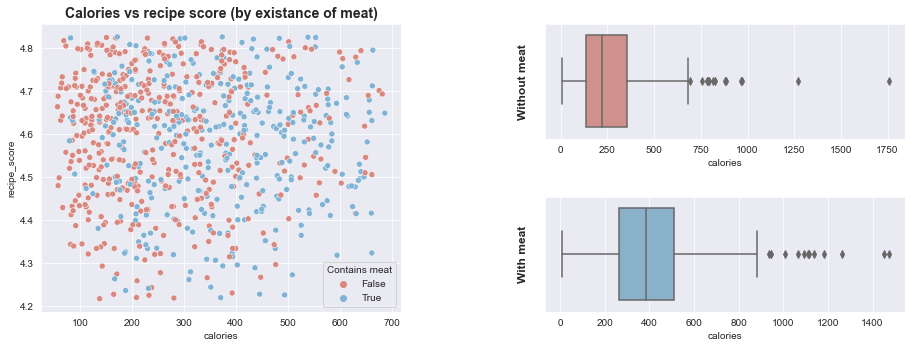

In [9]:
# Create a new column "has_meat"

types_of_meat = ['chicken', 'beef', 'turkey', 'poultry', 'lamb', 'pork', 'ham', 'bacon', 'sausage', 
                 'salami', 'meat', 'ribs', 'tuna', 'lobster', 'shrimp', 'salmon', 'fish', 'scallop']

allrecipes_df['has_meat'] = allrecipes_df['ingredients'].apply(lambda x: any(s.lower() in x for s in types_of_meat))

# Remove outliers for scatteplot

calories_filter = allrecipes_df.calories.between(left = allrecipes_df.calories.quantile(0.05),
                                         right = allrecipes_df.calories.quantile(0.95))

calories = allrecipes_df.calories[calories_filter]

recipe_score_filter = allrecipes_df.recipe_score.between(left = allrecipes_df.recipe_score.quantile(0.05),
                                         right = allrecipes_df.recipe_score.quantile(0.95))

recipe_score = allrecipes_df.recipe_score[recipe_score_filter]

has_meat = allrecipes_df['has_meat']

# Prepare figure and set axes

fig = plt.figure(figsize=(12, 5))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.5)

ax1 = plt.subplot(grid[0:, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[1, 1])
axes = [ax1, ax2, ax3]

plt.subplots_adjust(left=3, right=4, top=0.9, bottom=0.1)

# Plot

# Scatterplot - calories vs recipe score
g = sns.scatterplot(ax = axes[0], x = calories, y = recipe_score, hue = has_meat)
g.set_title('Calories vs recipe score (by existance of meat)', fontweight='bold', fontsize = 14)
g.legend(title = 'Contains meat')

# Boxplot - calories in recipes without meat
g = sns.boxplot(ax = axes[1], x = allrecipes_df.calories[allrecipes_df.has_meat == 0], color = '#D98880')
g.set_ylabel('Without meat', labelpad = 10, fontweight='bold', fontsize = 12)
                                                                            
# Bocplot - calories in recipes with meat
g = sns.boxplot(ax = axes[2], x = allrecipes_df.calories[allrecipes_df.has_meat == 1], color = '#7FB3D5')
g.set_ylabel('With meat', labelpad = 10, fontweight='bold', fontsize = 12)

plt.show()

Conclusions:
- There seems to be no correlation between caloric value of a dish and it's rating
- On average, recipes with meat are more caloric than the vegetarian ones

##### <b>Recipe score vs number of herbs used in a recipe:

In [10]:
# Create a new column "herbs_count"

allrecipes_df['herbs_count'] = allrecipes_df.loc[:, 'cinnamon':'mustard'].sum(axis = 1)

# Limit number of categories
# allrecipes_df['herbs_count'].value_counts() - shows that most recipes use 0 to 5 herbs

zero_to_five_herbs = allrecipes_df['herbs_count'].value_counts().values[0:6].sum()
print(f'Recipes where 0-5 herbs were used: {zero_to_five_herbs / allrecipes_df.shape[0]*100}%')

Recipes where 0-5 herbs were used: 96.1%


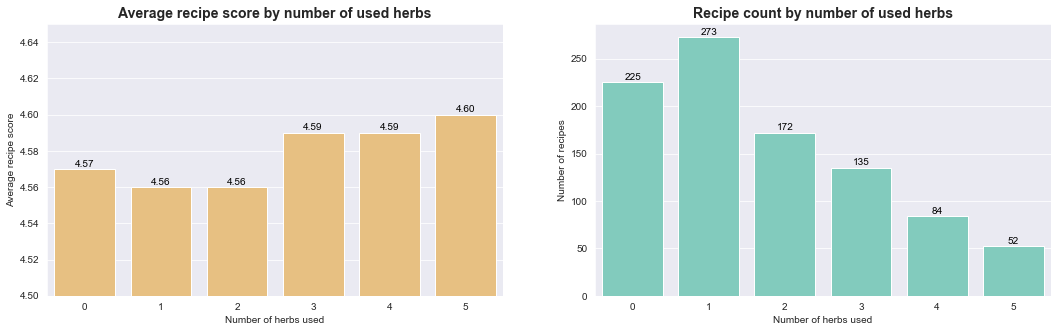

In [11]:
# Filter out recipes where more than five herbs are used
herbs_filter = (allrecipes_df.herbs_count <= 5)

score_herbs_count = allrecipes_df[['recipe_score', 'herbs_count']][herbs_filter]

# Count average score per each category
average_score_grouped = score_herbs_count.groupby(by = 'herbs_count').mean()

# Select data for first subplot
x1 = average_score_grouped.index.tolist()
y1 = average_score_grouped.values.round(2).flatten().tolist()


# Count number of recipes in each category
number_of_recipes_grouped = score_herbs_count.groupby(by = 'herbs_count').count()

# Select data for second subplot
x2 = number_of_recipes_grouped.index.tolist()
y2 = number_of_recipes_grouped.values.flatten().tolist()

# Define function annotating bars in barplot

def annotate_barplot(g, decimal_places = 0):
    '''Function takes a matplotlib object and number of decimal points to annotate bars in a barplot'''
    for p in g.patches:
             g.annotate(f'%.{decimal_places}f' % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                 textcoords='offset points')

# Prepare figure and axes

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
ax1, ax2 = axes

# Plot
# Barplot - average recipe score by number of herbs used in a recipe

ax1.set_ylim([4.5, 4.65])

g1 = sns.barplot(ax = ax1, x = x1, y = y1, color = '#F8C471')
g1.set_title('Average recipe score by number of used herbs', fontweight='bold', fontsize = 14)
g1.set(xlabel='Number of herbs used', 
      ylabel = 'Average recipe score')

annotate_barplot(g1, 2)

# Barplot - number of recipes by number of herbs used in a recipe

g2 = sns.barplot(ax = ax2, x = x2, y = y2, color = '#76D7C4')
g2.set_title('Recipe count by number of used herbs', fontweight='bold', fontsize = 14)
g2.set(xlabel='Number of herbs used', 
       ylabel = 'Number of recipes')

annotate_barplot(g2, 0)

plt.show()

Conclusions:
- Majority of recipes use limited number of herbs (about half of all recipes use at most one herb)
- Number of herbs used in a recipe seem to positively influence it's overall rating

### <center>TIME</center>
<center>This section is focused on time of recipes' preparation</center>

##### <b>Total cooking time by occurrence of meat:

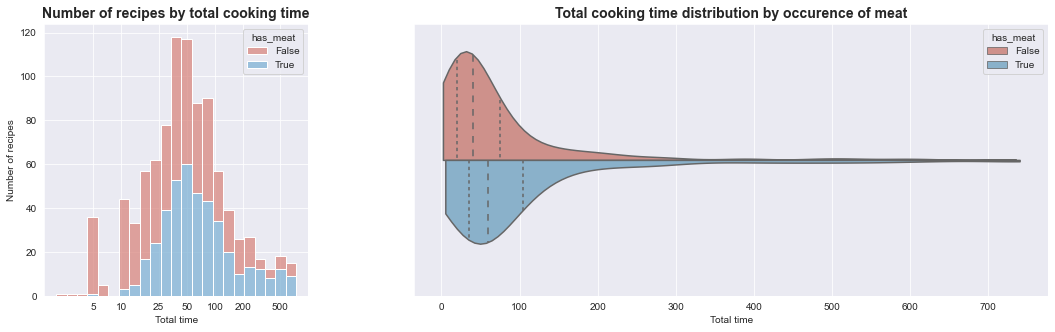

In [12]:
# Prepare data - initial exploration shows us that only a few recipes are by far more time consuming than the others.
# We can remove the 1% of most time consuming recipes to prepare (remove outliers)

# Select relevant data
total_time_data = allrecipes_df[['total', 'has_meat']][allrecipes_df.total <= allrecipes_df.total.quantile(0.99)]

# Prepare figure and axes

fig = plt.figure(figsize=(18, 5))
grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])
axes = [ax1, ax2]

# Import necessary module
import matplotlib.ticker as ticker

# Plot
# Histogram - total time
g1 = sns.histplot(ax = axes[0], 
                  x = total_time_data.total, 
                  hue = total_time_data.has_meat, 
                  multiple='stack', 
                  log_scale=True)

ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.set_xticks([5, 10, 25, 50, 100, 200, 500])

g1.set_title('Number of recipes by total cooking time', fontweight='bold', fontsize = 14)
g1.set(xlabel='Total time', 
      ylabel = 'Number of recipes')

# Violinplot - 

total_time_data['all'] = ''
g2 = sns.violinplot(x='total', 
                    y='all', 
                    hue='has_meat', 
                    data=total_time_data, 
                    split=True, 
                    scale='count', 
                    inner='quartile',
                    cut = 0)

g2.set_title('Total cooking time distribution by occurence of meat', fontweight='bold', fontsize = 14)
g2.set(xlabel='Total time', 
      ylabel = '')


plt.show()

Conclusions:

- Vegetarian recipes tend to take less time to prepare on average (but the difference is inconspicuous)
- The distribution of total time is similar for both vegetarian and non-vegetarian meals taking from 25 to 250 minutes
- There is way more meatless recipes that take little time to prepare
- Recipes taking the most time to prepare are dominated by the recipes with meat

##### <b>Distribution of different cooking times for recipes with and without meat:</b>

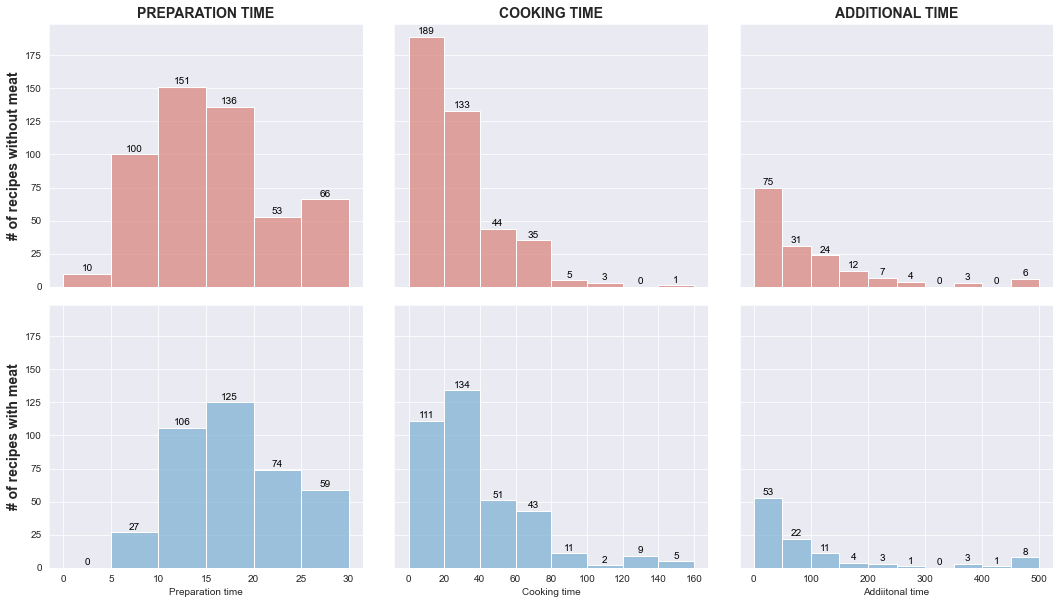

In [13]:
# Select relevant data
time_df = allrecipes_df[['prep', 'cook', 'additional', 'has_meat']]

# Prepare figure and set axes
fig, axes = plt.subplots(2, 3, figsize = (18, 10), sharey = True)

# Plot individual figures
# Plot first row - recipes without meat

g1 = sns.histplot(ax = axes[0,0], x = time_df.prep[time_df.prep <= allrecipes_df.prep.quantile(0.95)][time_df.has_meat == False], binwidth = 5, binrange = (0, 30))
g1.set_title('PREPARATION TIME', weight = 'bold', fontsize = 14)
g1.set_ylabel('# of recipes without meat', weight = 'bold', fontsize = 14)
g1.set_xlabel('')
g1.set_xticks([])

g2 = sns.histplot(ax = axes[0,1], x = time_df.cook[time_df.cook <= allrecipes_df.cook.quantile(0.95)][time_df.has_meat == False], binwidth = 20, binrange = (0, 160))
g2.set_title('COOKING TIME', weight = 'bold', fontsize = 14)
g2.set_xlabel('')
g2.set_xticks([])

g3 = sns.histplot(ax = axes[0,2], x = time_df.additional[time_df.additional <= allrecipes_df.additional.quantile(0.95)][time_df.has_meat == False], binwidth = 50, binrange = (0, 500))
g3.set_title('ADDITIONAL TIME', weight = 'bold', fontsize = 14)
g3.set_xlabel('')
g3.set_xticks([])

# Plot second row - recipes with meat

g4 = sns.histplot(ax = axes[1,0], x = time_df.prep[time_df.prep <= allrecipes_df.prep.quantile(0.95)][time_df.has_meat == True], binwidth = 5, binrange = (0, 30), color = '#7FB3D5')
g4.set_ylabel('# of recipes with meat', weight = 'bold', fontsize = 14)
g4.set_xlabel('Preparation time')

g5 = sns.histplot(ax = axes[1,1], x = time_df.cook[time_df.cook <= allrecipes_df.cook.quantile(0.95)][time_df.has_meat == True], binwidth = 20, binrange = (0, 160), color = '#7FB3D5')
g5.set_xlabel('Cooking time')

g6 = sns.histplot(ax = axes[1,2], x = time_df.additional[time_df.additional <= allrecipes_df.additional.quantile(0.95)][time_df.has_meat == True], binwidth = 50, binrange = (0, 500), color = '#7FB3D5')
g6.set_xlabel('Addiitonal time')

# Annotate bars

for g in (g1, g2, g3, g4, g5, g6):
    annotate_barplot(g, decimal_places = '0')

# Set padding for the plots and show results
plt.subplots_adjust(hspace=0.07, wspace=0.1)

plt.show()

Conclusions:

- Cooking time of vegetarian meels seem to be generally lower
- In both, recipes with and without meat, in vast majority of cases, meals are prepared in under one hour
- Preparation time in both cases resembles normal distribution
- There are multiple vegetarian recipes where preparation time is up to 10 minutes. Meals containing meat are prepared  rather in at least 10 or more minutes

### <center>HERBS</center>
<center>This section is aimed on the usage of herbs in recipes'</center>

##### <b>Percentage of recipes containing specific herbs - divided into recipes with and without meat:</b>

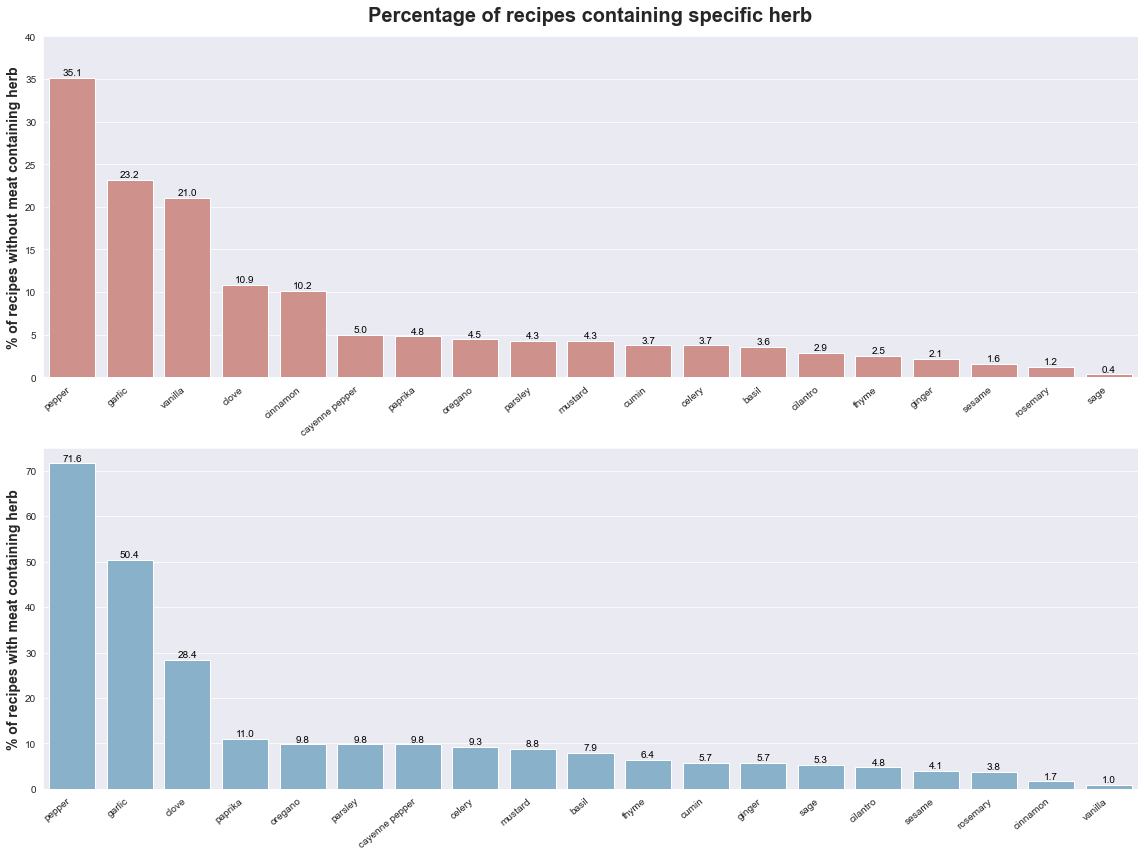

In [14]:
# Prepare data

herbs_info = allrecipes_df.loc[:, 'cinnamon':'mustard']
other_info = allrecipes_df[['has_meat', 'recipe_score']]
herbs_df = pd.concat([other_info, herbs_info], axis = 1)

# Drop records with NaN values

herbs_df.dropna(inplace = True)

# Recipes without meat data

herbs_no_meat = herbs_df[herbs_df.has_meat == False]

herbs_percents_no_meat = herbs_no_meat.loc[:, 'cinnamon':'mustard'].sum() / herbs_no_meat.shape[0] * 100

herbs_percents_no_meat.sort_values(inplace = True, ascending = False)

# Recipes with meat data

herbs_with_meat = herbs_df[herbs_df.has_meat == True]

herbs_percents_with_meat = herbs_with_meat.loc[:, 'cinnamon':'mustard'].sum() / herbs_with_meat.shape[0] * 100

herbs_percents_with_meat.sort_values(inplace = True, ascending = False)

# Prepare figure and axes

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1 - % of recipes without meat containing specific herbs

g1 = sns.barplot(ax = axes[0] , x = herbs_percents_no_meat.index, y = herbs_percents_no_meat.values, color = '#D98880')
g1.set_xticklabels(g1.get_xticklabels(), rotation=40, ha="right")
g1.set_ylim([0, 40])
g1.set_title('Percentage of recipes containing specific herb', weight = 'bold', fontsize = 20, pad = 15)
g1.set_ylabel('% of recipes without meat containing herb', weight = 'bold', fontsize = 14)
annotate_barplot(g1, 1)

# Plot 2 - % of recipes with meat containing specific herbs

g2 = sns.barplot(ax = axes[1] , x = herbs_percents_with_meat.index, y = herbs_percents_with_meat.values, color = '#7FB3D5')
g2.set_xticklabels(g2.get_xticklabels(), rotation=40, ha="right")
g2.set_ylim([0, 75])
g2.set_ylabel('% of recipes with meat containing herb', weight = 'bold', fontsize = 14)

annotate_barplot(g2, 1)

plt.tight_layout()
plt.show()

Conclusions:

- Pepper and garlic are the most commonly used herbs both in recipes with meat and vegetarian ones
- Vegetarian meals (probably the sweets, but it needs further verification) often use vanilla in the recipe, while it is one of the least common herbs for the recipes using meat
- In recipes without meat herbs seems to be used less often on average

##### <b>Whether recipes with meat use more herbs on average than recipes without meat:</b>

In [36]:
# Count the mean number of herbs used in recipes with and without meat
herbs_all_avg = allrecipes_df['herbs_count'].sum() / 1000
herbs_no_meat_avg = allrecipes_df[allrecipes_df.has_meat == False]['herbs_count'].sum() / allrecipes_df[allrecipes_df.has_meat == False].shape[0]
herbs_with_meat_avg = allrecipes_df[allrecipes_df.has_meat == True]['herbs_count'].sum() / allrecipes_df[allrecipes_df.has_meat == True].shape[0]

print(f'Average number of herbs used in all recipes: {herbs_all_avg:.3}')
print(f'Average number of herbs used in recipes without meat: {herbs_no_meat_avg:.3}')
print(f'Average number of herbs used in recipes with meat: {herbs_with_meat_avg:.3}')

Average number of herbs used in all recipes: 1.92
Average number of herbs used in recipes without meat: 1.44
Average number of herbs used in recipes with meat: 2.55


Conclusions:

- Recipes with meat seem to use more herbs on average than those without meat
- In order to verify whether mean difference in those two groups is statistically significant (is not a result of statistical fluctuations) additional hypothesis testing is needed (e.g. Student's t-test)

##### Average recipe score in groups of recipes containing specific herb:

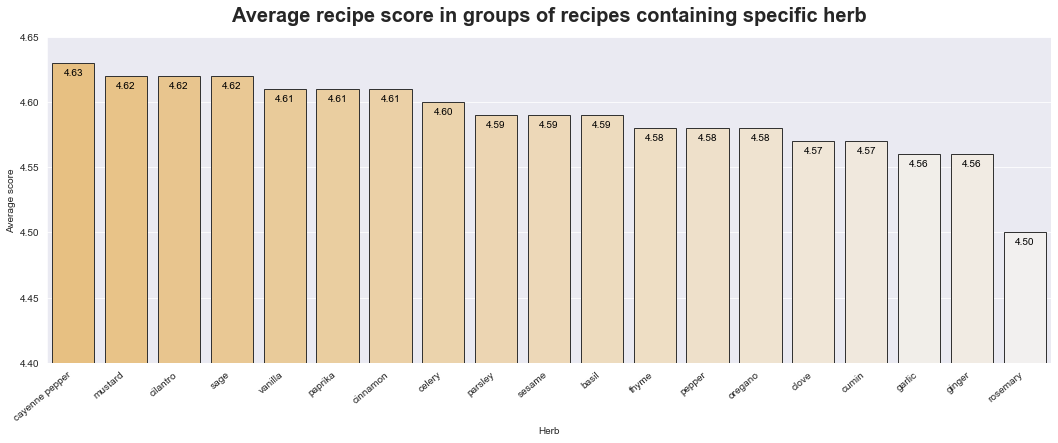

In [16]:
# Get the list of all herbs columns

herbs_list = herbs_info.columns

# Count average scores for recipes containing specific herbs
dict_herbs = {}
for herb in herbs_list:
    avg = round(allrecipes_df[allrecipes_df[herb] == 1]['recipe_score'].mean(), 2)
    dict_herbs[herb] = avg

# Save the results in a DataFrame and convert it to long format
herbs_score_df = pd.DataFrame(dict_herbs, index=[0])

herbs_score_df = (pd.melt(herbs_score_df)
                        .rename(columns = {'variable':'herb', 'value':'score'})
                        .sort_values(by = 'score', ascending = False)).reset_index(drop = True)

# Set color palette

def gen_color_palette(df, rank_col = '', col_palette = ''):
    pal = sns.color_palette(col_palette, len(df))
    rank = df[rank_col].argsort().argsort()
    return np.array(pal)[rank]

col_pal = gen_color_palette(df = herbs_score_df, rank_col = 'score', col_palette = 'light:#F8C471')

# Prepare figure

g = plt.figure(figsize=(18, 6))

# Plot data

g = sns.barplot(x=herbs_score_df['herb'], y=herbs_score_df['score'], palette=col_pal, edgecolor=".2",)
g.set_ylim([4.4, 4.65])
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.set_title('Average recipe score in groups of recipes containing specific herb', weight = 'bold', fontsize = 20, pad = 15)
g.set_ylabel('Average score', fontsize = 10)
g.set_xlabel('Herb', fontsize = 10)

# Annotate bars
for p in g.patches:
             g.annotate(f'%.2f' % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, -10),
                 textcoords='offset points')

# Display plot
plt.show()

Conclusions:

- In isolation, existence of specific herb within a recipe doesn't significantly influence the recipe score
- The one outlier would be Rosemary. Recipes containing that herb seem to be more disliked on average than the others

##### Effect of herb occurance on recipe's caloric value:

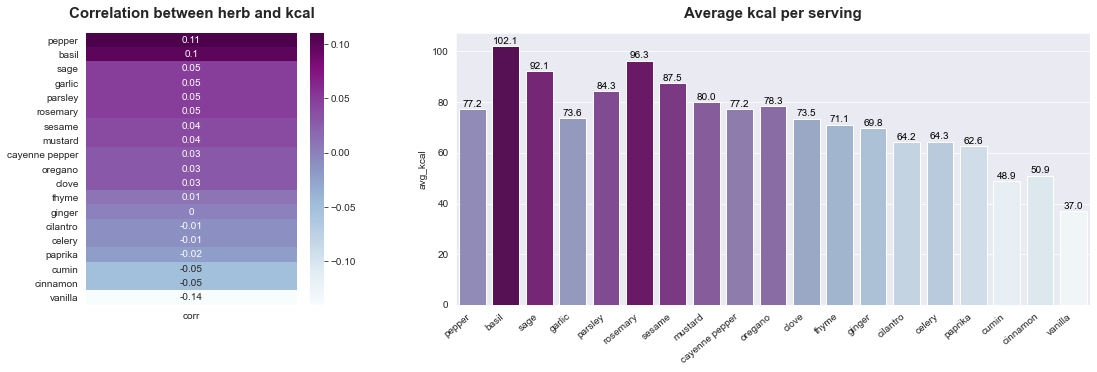

In [17]:
# Select data about correlation between existance of herb and recipe caloric value

herbs_calories_df = allrecipes_df.loc[:, 'cinnamon':'mustard'] 
herbs_calories_df = pd.concat([allrecipes_df['calories_per_serving'], herbs_calories_df], axis = 1)

herbs_calories_corr = herbs_calories_df.corr().round(2)['calories_per_serving'].sort_values(ascending = False)[1:]
herbs_calories_corr_df = pd.DataFrame(herbs_calories_corr).rename(columns = {'calories_per_serving':'corr'})

# Select data about average caloric value in groups of recipes containing specific herb

dict_herbs_kcal = {}
for herb in herbs_calories_df.columns[1:]:
    avg = round(herbs_calories_df[herbs_calories_df[herb] == 1]['calories_per_serving'].mean(), 1)
    dict_herbs_kcal[herb] = avg

herbs_kcal_df = pd.DataFrame(dict_herbs_kcal, index=[0])

herbs_kcal_df = (pd.melt(herbs_kcal_df)
                        .rename(columns = {'variable':'herb', 'value':'avg_kcal'})
                        .sort_values(by = 'avg_kcal', ascending = False)).set_index('herb')

# Join two datasets based on the index value

herbs_corr_avg_kcal = herbs_calories_corr_df.join(herbs_kcal_df)
herbs_corr_avg_kcal.index.name = 'herb'

# Prepare figure

fig = plt.figure(figsize=(18, 5))
grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])
axes = [ax1, ax2]

# Select data for the first plot

first_plot_data = pd.DataFrame(herbs_corr_avg_kcal['corr'])

# Plot first plot - one-dimensional correlation matrix

g1 = sns.heatmap(ax = axes[0],data = first_plot_data, annot=True, fmt="g", cmap='BuPu')
g1.set_title('Correlation between herb and kcal', weight = 'bold', fontsize = 15, pad = 15)
g1.set_ylabel('')
g1.set_xlabel('')

# Select data for the second plot

second_plot_data = herbs_corr_avg_kcal['avg_kcal'].reset_index()

# Create color palette for the second plot

col_pal = gen_color_palette(df = second_plot_data, rank_col = 'avg_kcal', col_palette = 'BuPu')

# Plot second plot - barplot of average kcal value of recipes by existance of the herb

g2 = sns.barplot(ax = axes[1], 
                 data = second_plot_data, 
                 x = 'herb', 
                 y = 'avg_kcal', 
                 palette=col_pal)

g2.set_title('Average kcal per serving', weight = 'bold', fontsize = 15, pad = 15)
g2.set_xticklabels(g2.get_xticklabels(), rotation=40, ha="right")
g2.set_xlabel('')
annotate_barplot(g2, 1)

plt.show()

Conclusions:

- None of the herbs is significantly correlated with the kcal per serving value of a recipe
- Correlation level does not go in line with average caloric value and there is no linear correlation between existance of herb and amount of kcal per serving in a recipe
- It looks like pepper increase calories per serving of the recipe the most out of all herbs. This is probably because it is often used in recipes with meat that have more calories per serving on average

### <center>NUTRITION</center>
<center>This section is focused on nutrients within recipes' and how they influence each other</center>

##### Five most caloric recipes:

In [18]:
allrecipes_df.loc[:, ['name', 'calories']].sort_values(by = 'calories', ascending = False).head(5)

,name,calories
269,Chef John's Perfect Prime Rib,1757.0
778,Chef John's Cuban Sandwich,1473.0
22,Classic Cuban Midnight (Medianoche) Sandwich,1453.0
471,Homemade Four Cheese Ravioli,1270.0
343,Chef John's Buttermilk Fried Chicken,1262.0


##### Ten recipes with highest protein value per serving:

In [19]:
(allrecipes_df.assign(f = allrecipes_df['protein [g]']/allrecipes_df['servings'])
                        .sort_values('f', ascending = False)
                        .drop('f', axis = 1)
                        .loc[:, ['name', 'protein [g]', 'servings']]
                        .head(10))

,name,protein [g],servings
441,Easy Tortilla Pizza,71.4,1
778,Chef John's Cuban Sandwich,88.2,2
969,Lobster Thermidor,76.7,2
315,Best Pork Chop Marinade,62.1,2
876,Chocolate Banana Peanut Butter Protein Shake,30.9,1
243,Baked Split Chicken Breast,54.5,2
101,Spicy Thai Basil Chicken (Pad Krapow Gai),49.8,2
559,Seafood Bake for Two,48.0,2
22,Classic Cuban Midnight (Medianoche) Sandwich,92.1,4
50,Basic Chicken Salad,44.3,2


##### Recipes with high protein value (in 75th percentile) and low caloric value (in 25th percentile):

In [20]:
protein_treshold = allrecipes_df['protein [g]'].quantile(0.75)
calories_treshold = allrecipes_df['calories'].quantile(0.25)

selector = (allrecipes_df['protein [g]'] >= protein_treshold) & (allrecipes_df['calories'] <= calories_treshold)

allrecipes_df.loc[:, ['name', 'calories', 'protein [g]']][selector]

,name,calories,protein [g]
309,Spicy Grilled Shrimp,164.0,25.1
531,Blackened Chicken,135.0,24.7
737,Easy Baked Tilapia,172.0,24.8


##### Dependencies between nutrients

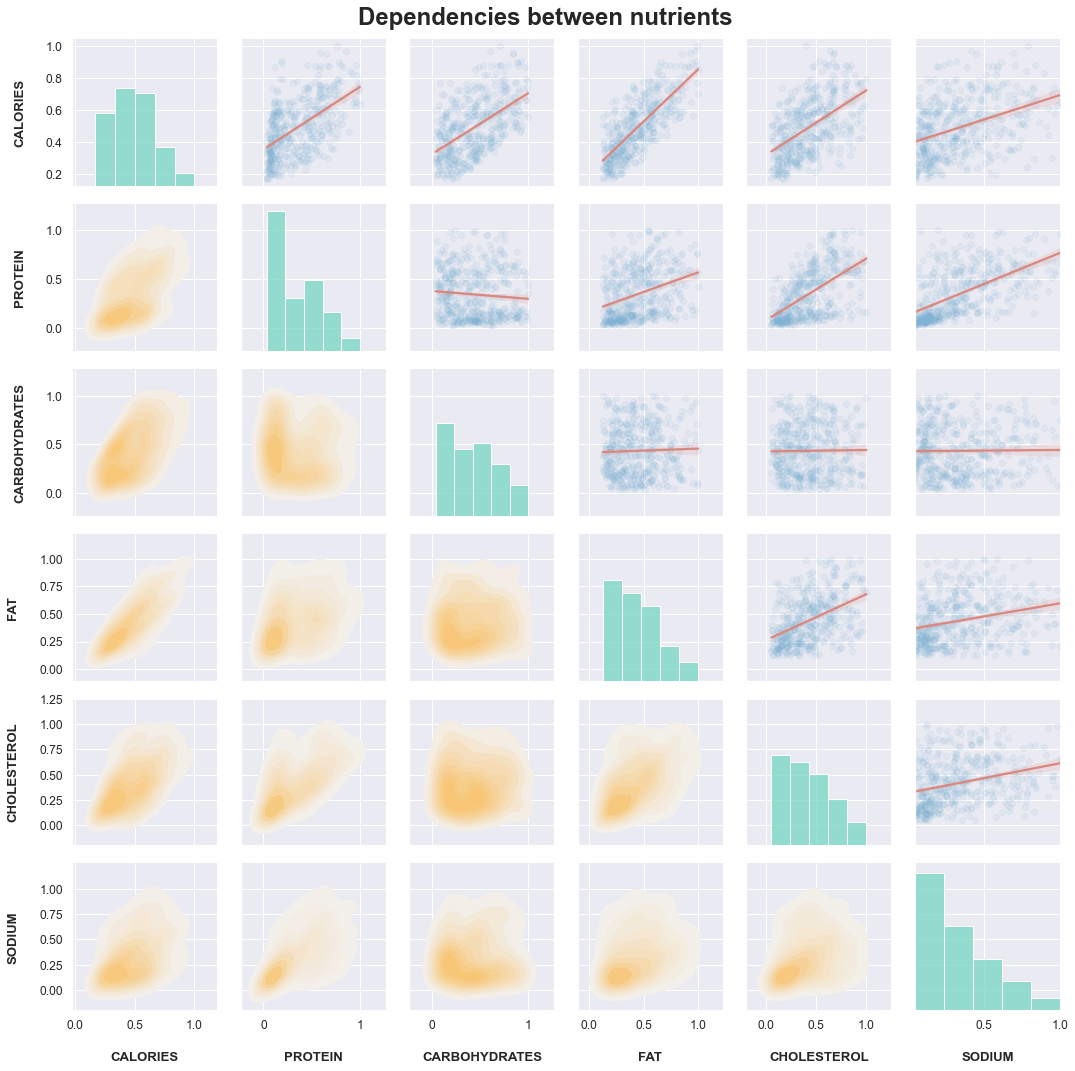

In [38]:
# Select the relevant features

df = allrecipes_df.loc[:, 'calories':'sodium [mg]']

# Remove records with null values

df.dropna(inplace = True)

# Remove the outliers

def remove_outliers(df):
    for column in df.columns:
        col = df[column]
        col = col[col.between(col.quantile(.05), col.quantile(.95))]
        df[column] = col
        # Values in rows that have been removed from column are replaced by NaN in the process.
        # Records containing null values are removed after each iteration.
        df.dropna(inplace = True)

remove_outliers(df)

# Normalize data

df = df.apply(lambda x: x/x.max(), axis=0)

# Change column names for nicer plotting

column_name_map = {'calories':'CALORIES', 
                   'protein [g]':'PROTEIN', 
                   'carbohydrates [g]':'CARBOHYDRATES', 
                   'fat [g]':'FAT',
                   'cholesterol [mg]':'CHOLESTEROL', 
                   'sodium [mg]':'SODIUM'}

df.rename(columns = column_name_map, inplace = True)

# Plot data
sns.set(font_scale = 1.1)

g = sns.PairGrid(df, dropna = True)

# Diagonal subplots
g.map_diag(sns.histplot, bins = 5, color = '#76D7C4')

# Upper diagonal subplots
g.map_upper(sns.regplot, scatter_kws={'alpha':0.1, 'color':'#7FB3D5'}, line_kws={'color':'#D98880'})

# Lower diagonal subplots
cmap = sns.light_palette('#F8C471', as_cmap=True)
g.map_lower(sns.kdeplot, fill=True, cmap=cmap)

# Adjust labels and title
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Dependencies between nutrients', weight = 'bold', fontsize = 24, y = 0.98)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), weight = 'bold', labelpad = 20)
    ax.set_ylabel(ax.get_ylabel(), weight = 'bold', labelpad = 20)

plt.show()

Conclusions:

- You can observe a high positive correlation between calories and fat
- Calories are positively correlated with amount of carbohydrates in a recipe but the relation is weaker than in case of fat
- Carbohydrates show the lowest degree of correlation to other nutrients
- All nutrients apart of carbohydrates show to have at least some relation with each other

### <center>SUMMARY</center>

We have come to the end of this quick analysis. Before we finish let's sum up all of the insights we have drawn from the Allrecipes dataset. Here's the list of all conclusions divided into categories:

<b>Recipe score:</b>
- There seems to be no correlation between caloric value of a dish and it's rating
- On average, recipes with meat are more caloric than the vegetarian ones
- Majority of recipes use limited number of herbs (about half of all recipes use at most one herb)
- Number of herbs used in a recipe seem to positively influence it's overall rating

<b>Time:</b>
- Vegetarian recipes tend to take less time to prepare on average (but the difference is inconspicuous)
- The distribution of total time is similar for both vegetarian and non-vegetarian meals taking from 25 to 250 minutes
- There is way more meatless recipes that take little time to prepare
- Recipes taking the most time to prepare are dominated by the recipes with meat
- Cooking time of vegetarian meels seem to be generally lower
- In both, recipes with and without meat, in vast majority of cases, meals are prepared in under one hour
- Preparation time in both cases resembles normal distribution
- There are multiple vegetarian recipes where preparation time is up to 10 minutes. Meals containing meat are prepared  rather in at least 10 or more minutes

<b>Herbs:</b>
- Pepper and garlic are the most commonly used herbs both in recipes with meat and vegetarian ones
- Vegetarian meals (probably the sweets, but it needs further verification) often use vanilla in the recipe, while it is one of the least common herbs for the recipes using meat
- In recipes without meat herbs seems to be used less often on average
- Recipes with meat seem to use more herbs on average than those without meat
- In order to verify whether mean difference in those two groups is statistically significant (is not a result of statistical fluctuations) additional hypothesis testing is needed (e.g. Student's t-test)
- In isolation, existence of specific herb within a recipe doesn't significantly influence the recipe score
- The one outlier would be Rosemary. Recipes containing that herb seem to be more disliked on average than the others
- None of the herbs is significantly correlated with the kcal per serving value of a recipe
- Correlation level does not go in line with average caloric value and there is no linear correlation between existance of herb and amount of kcal per serving in a recipe
- It looks like pepper increase calories per serving of the recipe the most out of all herbs. This is probably because it is often used in recipes with meat that have more calories per serving on average

<b>Nutrition:</b>
- You can observe a high positive correlation between calories and fat
- Calories are positively correlated with amount of carbohydrates in a recipe but the relation is weaker than in case of fat
- Carbohydrates show the lowest degree of correlation to other nutrients
- All nutrients apart of carbohydrates show to have at least some relation with each other